In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [2]:
mpg=pd.read_csv('mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
mpg.shape

(398, 9)

In [4]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
# horsepower has int values but it is object

In [6]:
mpg['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
95     14
75     14
67     12
105    12
70     12
65     10
85      9
97      9
145     7
80      7
140     7
72      6
92      6
68      6
?       6
78      6
84      6
170     5
175     5
130     5
60      5
86      5
180     5
71      5
115     5
165     4
120     4
83      4
76      4
52      4
125     3
48      3
215     3
112     3
190     3
74      3
69      3
96      3
63      3
225     3
46      2
153     2
81      2
53      2
139     2
198     2
129     2
58      2
98      2
155     2
160     2
62      2
87      2
79      2
167     1
158     1
138     1
210     1
64      1
103     1
107     1
152     1
135     1
49      1
133     1
149     1
220     1
108     1
200     1
148     1
102     1
137     1
208     1
66      1
91      1
132     1
61      1
142     1
94      1
82      1
93      1
122     1
89      1
116     1
230     1
77      1
54      1
113     1
193     1
Name: horsepower, dtype: int64

In [7]:
# it has 6 values marked as ?
# lets convert them to 0

In [8]:
mpg['horsepower']=mpg['horsepower'].str.replace('?','0')

In [9]:
# lets convert the dtype
mpg['horsepower']=mpg['horsepower'].astype(np.int64)
mpg['horsepower'].dtype

dtype('int64')

In [10]:
mpg['horsepower']=mpg['horsepower'].replace(0,np.NaN)

In [11]:
mpg['horsepower'].isnull().sum()

6

In [12]:
mpg['horsepower'].mean(),mpg['horsepower'].median()

(104.46938775510205, 93.5)

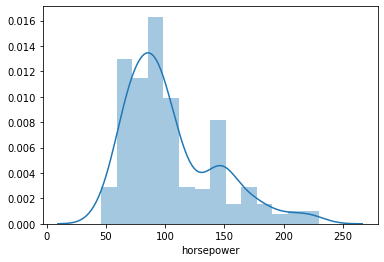

In [13]:
# lets check the distribution
sns.distplot(mpg['horsepower'].dropna())

In [14]:
# lets replace nan by median i.e.93
mpg['horsepower']=mpg['horsepower'].replace(np.NaN,93)

In [15]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [16]:
mpg['car name'].nunique()

305

In [17]:
# there is no significant info in this column
# lets drop it
mpg.drop('car name',axis=1,inplace=True)

In [18]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [19]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'], dtype='object')

In [20]:
# remove space from the names of columns
mpg.columns = mpg.columns.str.replace(' ', '_')

In [21]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin'], dtype='object')

# EDA

# Univariate

In [22]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.296482,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.224809,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [23]:
# here, all the columns are continuous

In [24]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin'], dtype='object')

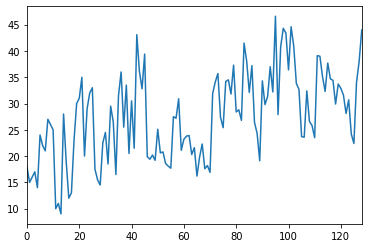

In [25]:
pd.Series(mpg['mpg'].unique()).plot()

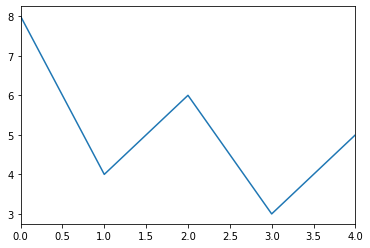

In [26]:
pd.Series(mpg['cylinders'].unique()).plot()

In [27]:
mpg['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

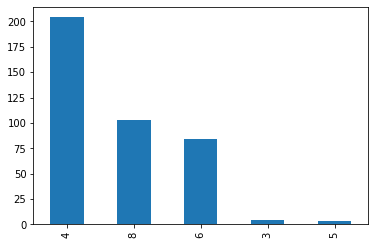

In [28]:
mpg['cylinders'].value_counts().plot.bar()

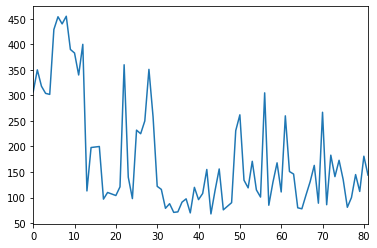

In [29]:
pd.Series(mpg['displacement'].unique()).plot()

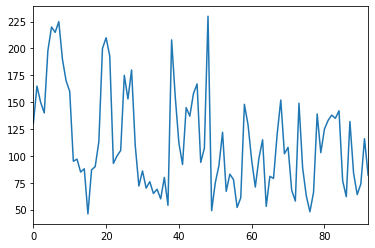

In [30]:
pd.Series(mpg['horsepower'].unique()).plot()

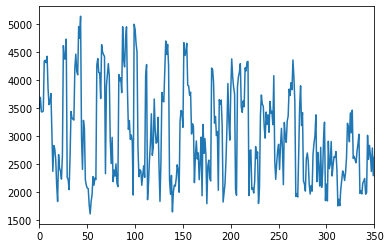

In [31]:
pd.Series(mpg['weight'].unique()).plot()

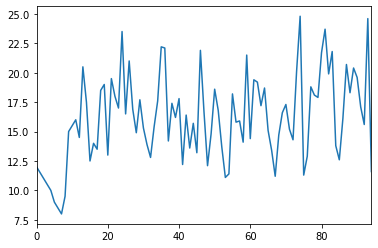

In [32]:
pd.Series(mpg['acceleration'].unique()).plot()

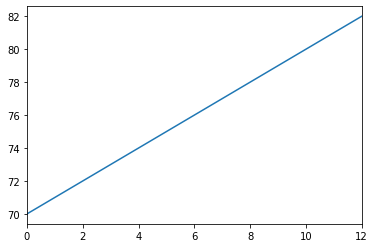

In [33]:
pd.Series(mpg['model_year'].unique()).plot()

In [34]:
mpg['model_year'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: model_year, dtype: int64

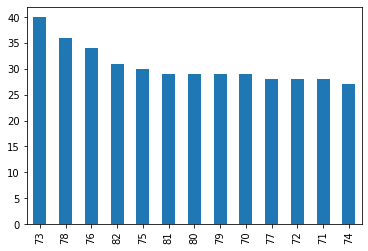

In [35]:
mpg['model_year'].value_counts().plot.bar()

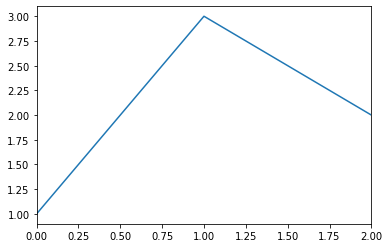

In [36]:
pd.Series(mpg['origin'].unique()).plot()

In [37]:
mpg['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

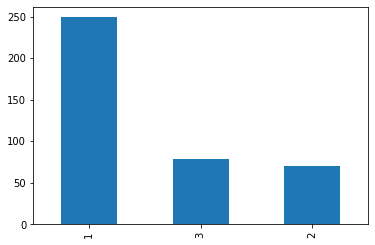

In [38]:
mpg['origin'].value_counts().plot.bar()

In [39]:
# apply binning in cylinders

In [40]:
# cylinder, model_year and origin can be considered as categorical

# Bivariate

In [41]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin'], dtype='object')

In [42]:
mpg.groupby('cylinders').mean()[['mpg','displacement','horsepower', 'weight', 'acceleration']]

,mpg,displacement,horsepower,weight,acceleration
cylinders,,,,,
3,20.550000,72.500000,99.250000,2398.500000,13.250000
4,29.286765,109.796569,78.642157,2308.127451,16.601471
5,27.366667,145.000000,82.333333,3103.333333,18.633333
6,19.985714,218.142857,101.404762,3198.226190,16.263095
8,14.963107,345.009709,158.300971,4114.718447,12.955340


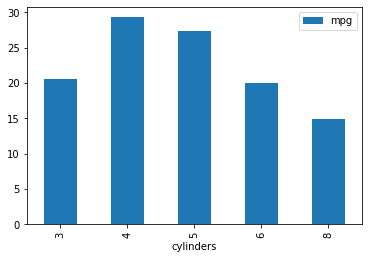

In [43]:
mpg.groupby('cylinders').mean()[['mpg']].plot.bar()

In [44]:
mpg.groupby('model_year').mean()[['mpg','displacement','horsepower', 'weight', 'acceleration']]

,mpg,displacement,horsepower,weight,acceleration
model_year,,,,,
70,17.689655,281.413793,147.827586,3372.793103,12.948276
71,21.250000,209.750000,106.535714,2995.428571,15.142857
72,18.714286,218.375000,120.178571,3237.714286,15.125000
73,17.100000,256.875000,130.475000,3419.025000,14.312500
74,22.703704,171.740741,94.185185,2877.925926,16.203704
75,20.266667,205.533333,101.066667,3176.800000,16.050000
76,21.573529,197.794118,101.117647,3078.735294,15.941176
77,23.375000,191.392857,105.071429,2997.357143,15.435714
78,24.061111,177.805556,99.694444,2861.805556,15.805556


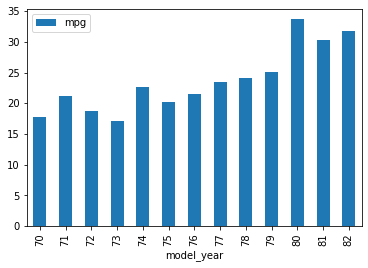

In [45]:
mpg.groupby('model_year').mean()[['mpg']].plot.bar()

In [46]:
mpg.groupby('origin').mean()[['mpg','displacement','horsepower', 'weight', 'acceleration']]

,mpg,displacement,horsepower,weight,acceleration
origin,,,,,
1,20.083534,245.901606,118.630522,3361.931727,15.033735
2,27.891429,109.142857,80.914286,2423.300000,16.787143
3,30.450633,102.708861,79.835443,2221.227848,16.172152


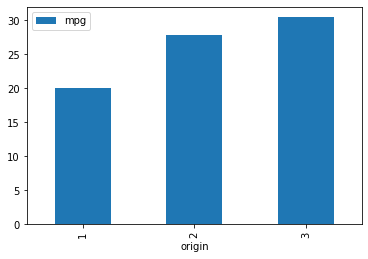

In [47]:
mpg.groupby('origin').mean()[['mpg']].plot.bar()

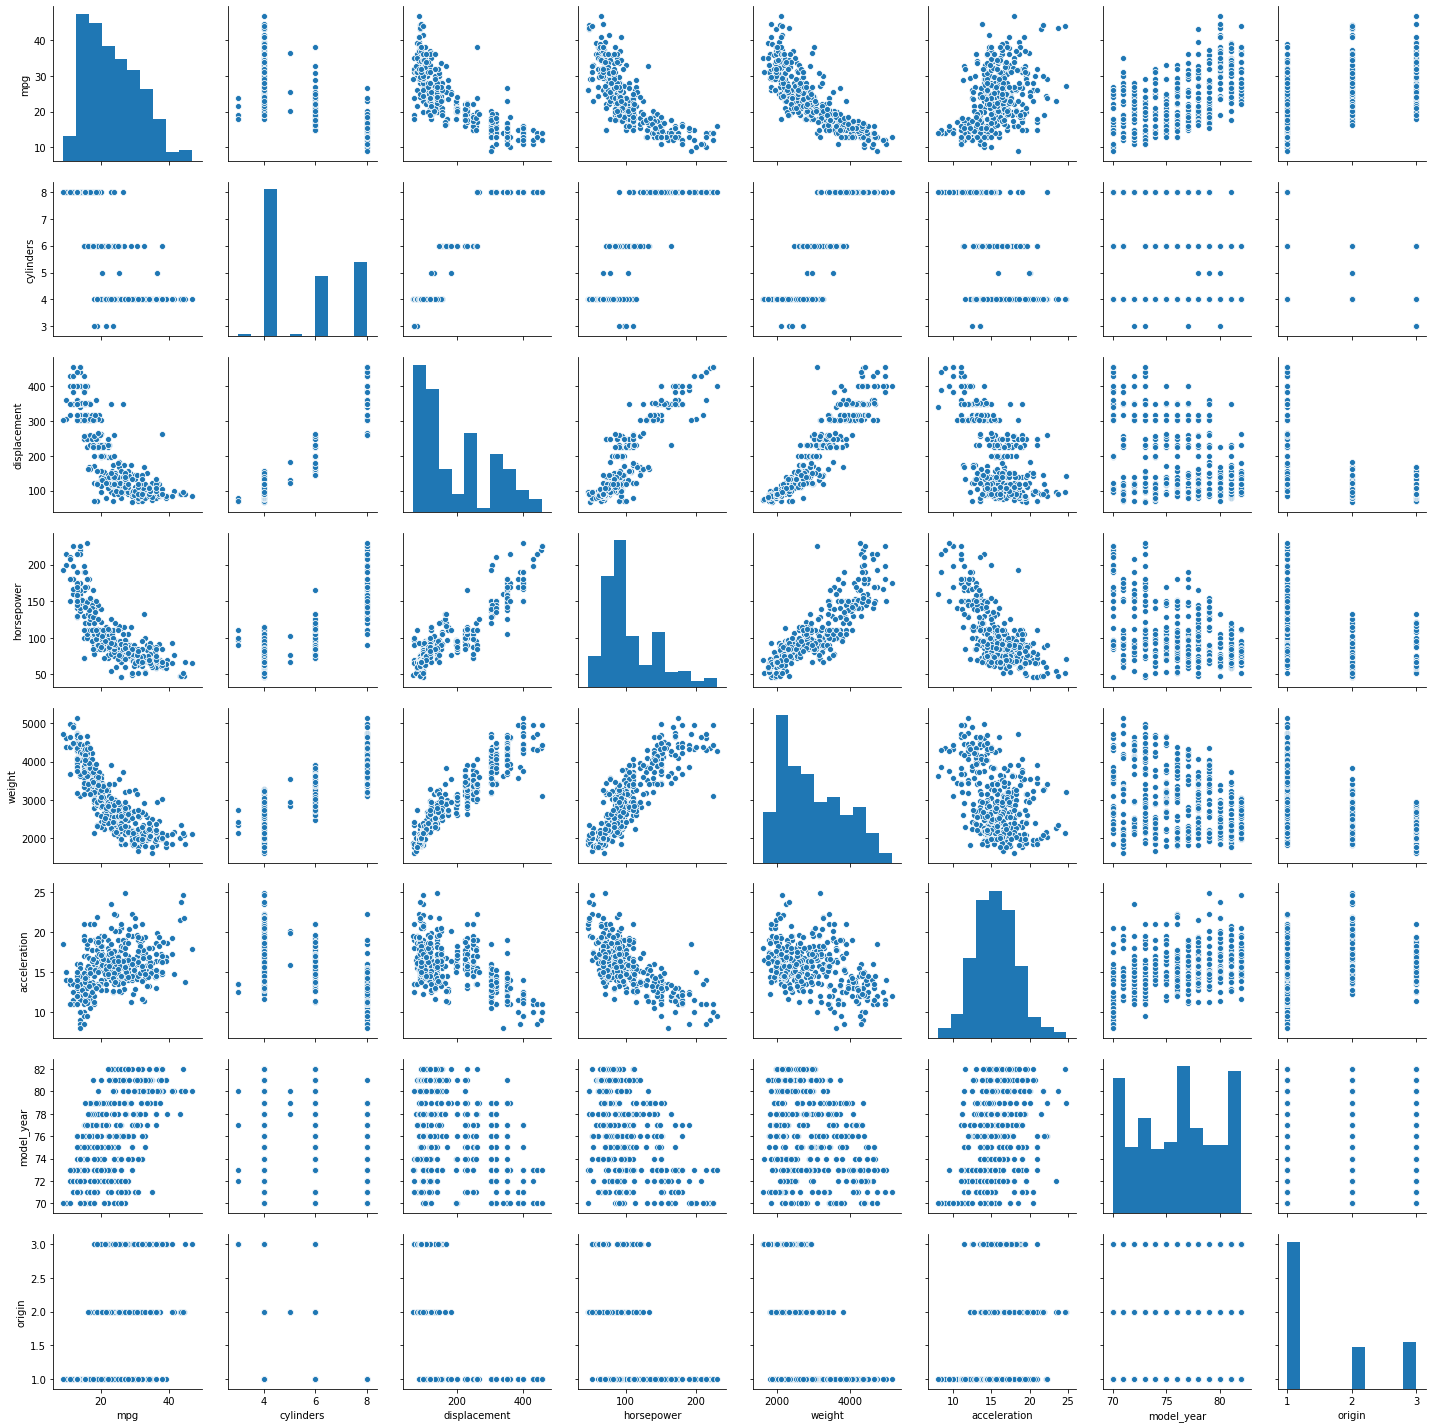

In [48]:
sns.pairplot(mpg)

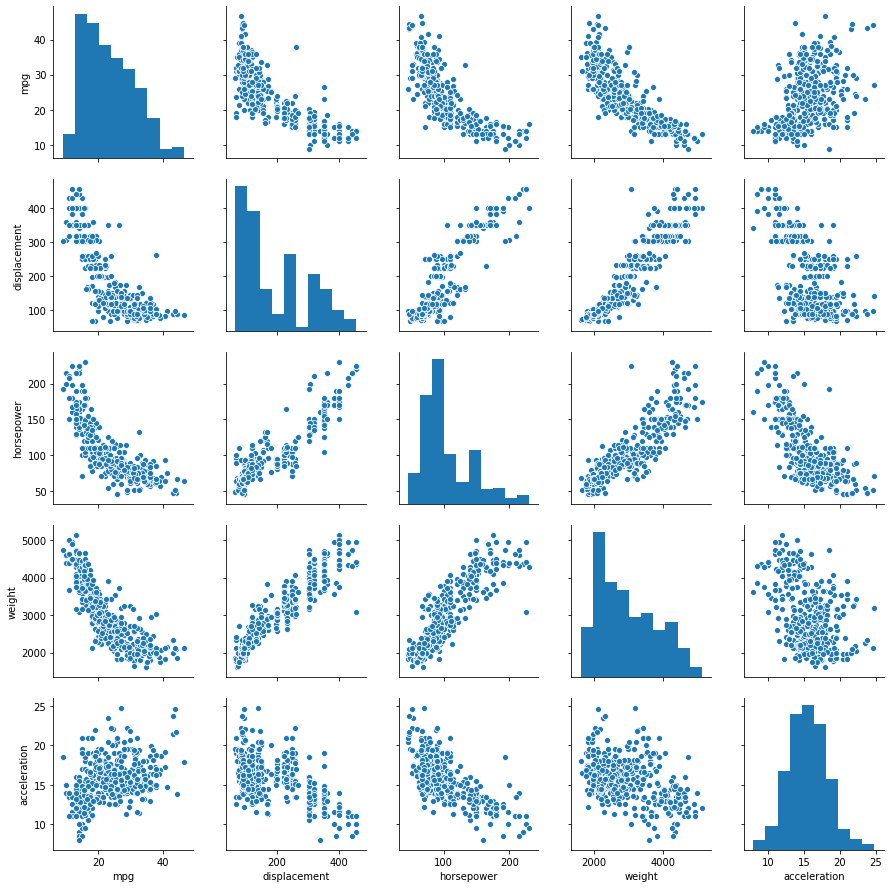

In [49]:
sns.pairplot(mpg,vars=['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'])

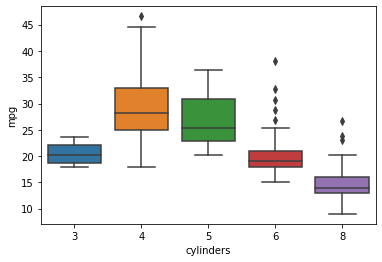

In [50]:
sns.boxplot(data=mpg,x='cylinders',y='mpg')

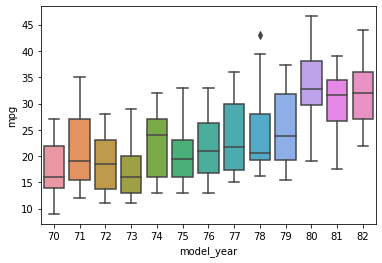

In [51]:
sns.boxplot(data=mpg,x='model_year',y='mpg')

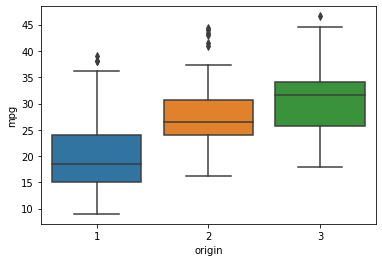

In [52]:
sns.boxplot(data=mpg,x='origin',y='mpg')

# Distribution and Corr

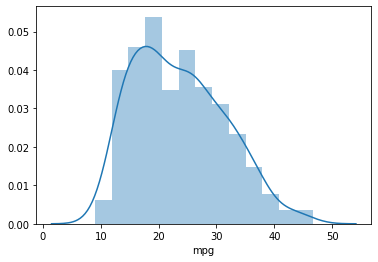

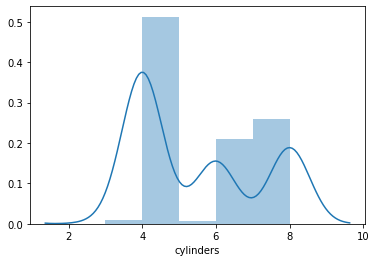

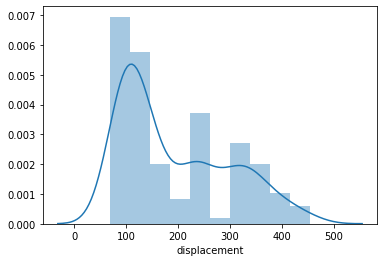

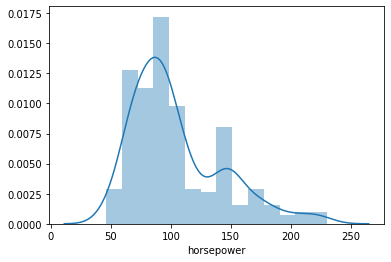

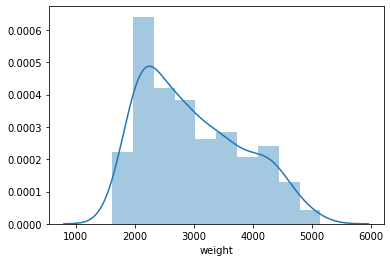

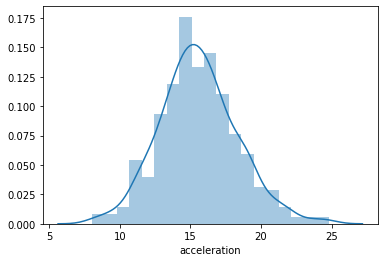

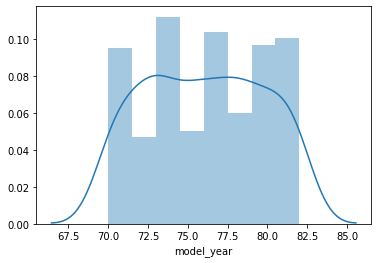

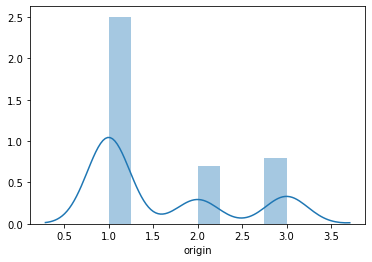

In [53]:
cols=mpg.columns.values
for i in cols:
    plt.subplots()
    sns.distplot(mpg[i])

In [54]:
mpg.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.106579
weight          0.531063
acceleration    0.278777
model_year      0.011535
origin          0.923776
dtype: float64

In [55]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773522,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841367,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895849,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773522,0.841367,0.895849,1.000000,0.862502,-0.686676,-0.413816,-0.452011
weight,-0.831741,0.896017,0.932824,0.862502,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686676,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.413816,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452011,-0.581024,0.205873,0.180662,1.000000


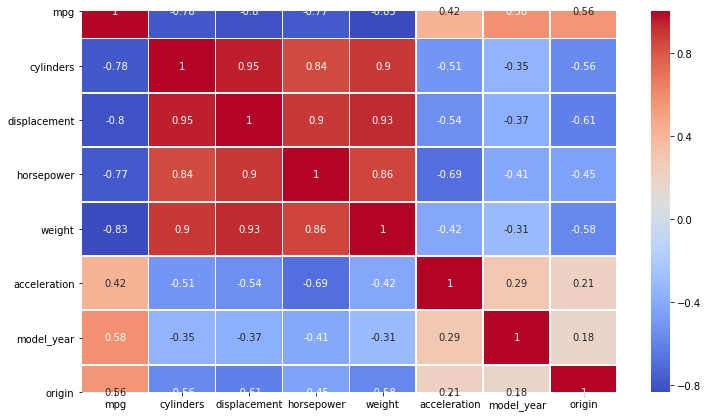

In [56]:
plt.figure(figsize=(12,7))
sns.heatmap(mpg.corr(),annot=True,cmap='coolwarm',linewidths=0.8)

In [57]:
# a lot of strong corr

# cylinder and displacement,weight,horsepower
# displacement and horsepower

# Outliers

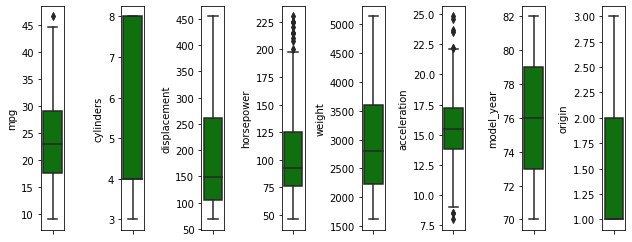

In [58]:
plt.figure(figsize=(10,30))
for i in range(len(cols)):
    plt.subplot(9,9,i+1)
    sns.boxplot(mpg[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [59]:
# in mpg, horsepower and acceleration

In [60]:
# using IQR method
# using IQR method
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out=(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return(df_out.sum())

def lower(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower=Q1 - 1.5 * IQR
    return lower

def upper(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper=Q3 + 1.5 * IQR
    return upper

def treat_outlier(df,col):
    for i in range(df.shape[0]):
        if (df[col].iloc[i])>upper(df,col):
            df[col].iloc[i]=upper(df,col)
        elif (df[col].iloc[i])<lower(df,col):
            df[col].iloc[i]=lower(df,col)
            
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return (df.shape)

In [61]:
outlier(mpg)

mpg              1
cylinders        0
displacement     0
horsepower      11
weight           0
acceleration     9
model_year       0
origin           0
dtype: int64

In [62]:
# lets remove the outliers and check the shape
mpgout=mpg.copy()

In [63]:
remove_outlier(mpgout)

(378, 8)

In [64]:
# removed 20 rows

In [65]:
# lets use zscore method
mpgz=mpg.copy()

In [66]:
from scipy.stats import zscore
z=np.abs(zscore(mpgz))
len(np.where(z>3)[0])

7

In [67]:
# lets remove outliers using zscore method
mpgz=mpgz[(z<3).all(axis=1)]

In [68]:
# lets treat outliers of mpg using IQR method
treat_outlier(mpg,'mpg')
treat_outlier(mpg,'horsepower')
treat_outlier(mpg,'acceleration')

# Definitions

In [69]:
# this is a regression problem

In [70]:
# lets seperate x and y first

In [71]:
x=mpg.drop('mpg',axis=1)
y=mpg['mpg']

In [72]:
x2=mpgout.drop('mpg',axis=1)
y2=mpgout['mpg']

In [73]:
xz=mpgz.drop('mpg',axis=1)
yz=mpgz['mpg']

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [157]:
# Now, let's define some functions to reuse them
def fit(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    
def get_score(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return train_score,test_score,rmse

def get_pred(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

def get_metrics(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    mse=mean_squared_error(pred,y_test)
    mae=mean_absolute_error(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return mse,rmse,mae

from sklearn.model_selection import GridSearchCV
def gridcv(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=5,verbose=5,scoring='neg_mean_squared_error')
    gkb.fit(x,y)
    return gkb.best_params_


from sklearn.model_selection import RandomizedSearchCV
def randomcv(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=5,n_iter=75,scoring='neg_mean_squared_error',
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
def bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, verbose=3, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    return xbfe

def ffs(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    return xffs

from sklearn.decomposition import PCA
def nforpca(x):
    pca=PCA().fit(x)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('No of Components')
    plt.ylabel('Variance')
    plt.axhline(y=95, color='r', linestyle='--')
    plt.show()
    
def pca(m,x,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    return xpca


def cross(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1,scoring='r2')
    return (score.mean(), score.std())

from sklearn.preprocessing import StandardScaler
def std(x):
    scx=StandardScaler()
    xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
    return xs

from sklearn.preprocessing import MinMaxScaler
def mmc(x):
    mm=MinMaxScaler()
    xm=pd.DataFrame(mm.fit_transform(x), columns=x.columns)
    return xm

def modified_bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xbfe,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def modified_ffs(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xffs,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def modified_pca(m,x,y,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    x_train, x_test, y_train, y_test=train_test_split(xpca,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def tts(x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    return x_train, x_test, y_train, y_test

In [76]:
lr=LinearRegression(n_jobs=-1)
dt=DecisionTreeRegressor(random_state=45)
svr=SVR()
knn=KNeighborsRegressor(n_jobs=-1)
rid=Ridge(random_state=45)
ls=Lasso(random_state=45)
rf=RandomForestRegressor(n_jobs=-1,random_state=45)
gb=GradientBoostingRegressor(random_state=45)
xgb=XGBRegressor(n_jobs=-1,random_state=45)
ada=AdaBoostRegressor(random_state=45)

# Iteration A

In [80]:
# 1St iteration
print("Model Evaluation with x and y")
print("LR ", get_score(lr,x,y))
print("DT ", get_score(dt,x,y))
print("SVR ", get_score(svr,x,y))
print("KNN ", get_score(knn,x,y))
print("RID ", get_score(rid,x,y))
print("LS ", get_score(ls,x,y))
print("RF ", get_score(rf,x,y))
print("XGB ", get_score(xgb,x,y))
print("GB ", get_score(gb,x,y))

Model Evaluation with x and y
LR  (0.8204572123451199, 0.7878101785063429, 2.9830441004571786)
DT  (1.0, 0.6596806204201631, 4.309953596037897)
SVR  (0.18310328511784135, -2846.221760381133, 6.972515195453807)
KNN  (0.8182802833053895, 0.5832114997193212, 4.257133777555034)
RID  (0.8204565853974214, 0.7875378620681011, 2.984787838556173)
LS  (0.8121072412169379, 0.7488235510141815, 3.2154046219348724)
RF  (0.974431813482827, 0.7944164613592549, 3.0504837321316765)
XGB  (0.9999802441328476, 0.7987397737159205, 3.0818374782772664)
GB  (0.9733982374639152, 0.7744759780845903, 3.2236195469945343)


# Iteration B

In [81]:

print("LR ", get_score(lr,x2,y2))
print("DT ", get_score(dt,x2,y2))
print("SVR ", get_score(svr,x2,y2))
print("KNN ", get_score(knn,x2,y2))
print("RID ", get_score(rid,x2,y2))
print("LS ", get_score(ls,x2,y2))
print("RF ", get_score(rf,x2,y2))
print("XGB ", get_score(xgb,x2,y2))
print("GB ", get_score(gb,x2,y2))

LR  (0.8201360289438595, 0.7854859551217505, 3.0019365642032367)
DT  (1.0, 0.6604134474567319, 4.30531067403968)
SVR  (0.1829750178385796, -2846.221760381133, 6.972515195453807)
KNN  (0.8181297385326607, 0.581044457694741, 4.254154205009499)
RID  (0.8201354140184504, 0.7852206828156398, 3.0036537389314315)
LS  (0.8114631378768701, 0.7486628654681728, 3.218501763860951)
RF  (0.9730455614551228, 0.7905597937066935, 3.0575259606420357)
XGB  (0.9999704976974654, 0.8012588899392054, 3.0444314495917064)
GB  (0.9727292219176976, 0.7664255779494236, 3.2924183361648645)


# Iteration C

In [82]:

print("LR ", get_score(lr,xz,yz))
print("DT ", get_score(dt,xz,yz))
print("SVR ", get_score(svr,xz,yz))
print("KNN ", get_score(knn,xz,yz))
print("RID ", get_score(rid,xz,yz))
print("LS ", get_score(ls,xz,yz))
print("RF ", get_score(rf,xz,yz))
print("XGB ", get_score(xgb,xz,yz))
print("GB ", get_score(gb,xz,yz))

LR  (0.8271512861919263, 0.75860553373852, 3.335229820697999)
DT  (1.0, 0.7151353690028421, 4.084490326159409)
SVR  (0.18996011131960278, -3502.5141174208334, 7.452706490231859)
KNN  (0.8128777626647283, 0.5761683119116101, 4.133703681016454)
RID  (0.827150153603591, 0.7584914102833169, 3.3353055377229235)
LS  (0.814188306853165, 0.7274125542044165, 3.4603303811274486)
RF  (0.9771202723133653, 0.7810702678788364, 3.3788192298131463)
XGB  (0.9999929065023213, 0.8036802693030993, 3.2362752444032084)
GB  (0.9739087929031236, 0.8022310153324475, 3.231674907401967)


In [83]:
# lr with x 0.8204572123451199, 0.7878101785063429, 2.9830441004571786
# dt with xz 1.0, 0.7151353690028421, 4.084490326159409
# svr with x 0.1829750178385796, -2846.221760381133, 6.972515195453807
# knn with x2 0.8181297385326607, 0.581044457694741, 4.254154205009499
# rid with x 0.8204565853974214, 0.7875378620681011, 2.984787838556173
# LS with x 0.8121072412169379, 0.7488235510141815, 3.2154046219348724
# RF with x 0.974431813482827, 0.7944164613592549, 3.0504837321316765
# xgb with x2 0.9999704976974654, 0.8012588899392054, 3.0444314495917064
# gb with xz 0.9739087929031236, 0.8022310153324475, 3.231674907401967

# iteration D

In [84]:
# lets scale the data
xs=std(x)
x2s=std(x2)
xzs=std(xz)

In [85]:
print("LR ", get_score(lr,xs,y))
print("DT ", get_score(dt,xzs,yz))
print("SVR ", get_score(svr,xs,y))
print("KNN ", get_score(knn,x2s,y2))
print("RID ", get_score(rid,xs,y))
print("LS ", get_score(ls,xs,y))
print("RF ", get_score(rf,xs,y))
print("XGB ", get_score(xgb,x2s,y2))
print("GB ", get_score(gb,xzs,yz))

LR  (0.8204572123451199, 0.7878101785063438, 2.983044100457179)
DT  (1.0, 0.7151353690028421, 4.084490326159409)
SVR  (0.8533181336170222, 0.7914219478728521, 2.748458371456396)
KNN  (0.9159261798843517, 0.8014821005466788, 2.9495464058054757)
RID  (0.8203545164667916, 0.7882643856469739, 2.9719767357184255)
LS  (0.7908574295572228, 0.6393110153079434, 3.2835204152195145)
RF  (0.9744998778450099, 0.7944786507339493, 3.048916036889177)
XGB  (0.9999704976974654, 0.8007002475525646, 3.0486595449643)
GB  (0.9739087929031236, 0.8044093166858375, 3.2191259764265814)


# conclusion

In [87]:
# we'll implement following models:

# gb with xzs 0.9739087929031236, 0.8044093166858375, 3.2191259764265814
# knn with x2s 0.9159261798843517, 0.8014821005466788, 2.9495464058054757
# svr with xs 0.8533181336170222, 0.7914219478728521, 2.748458371456396
# rid with xs 0.8203545164667916, 0.7882643856469739, 2.9719767357184255

# KNN

In [88]:
# knn with x2s 0.9159261798843517, 0.8014821005466788, 2.9495464058054757

In [89]:
# knn=KNeighborsRegressor(n_jobs=-1)

In [90]:
# Individual Model Pipeline:

# feature binning
# skewness removal

# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [123]:
# lets apply feature binning in cylinders
x2b=x2.copy()
x2b['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [124]:
for i in range(len(x2b)):
    if x2b['cylinders'].iloc[i]==5 or x2b['cylinders'].iloc[i]==3:
         x2b['cylinders'].iloc[i]=6

In [125]:
x2b['cylinders'].value_counts()

4    204
8    103
6     91
Name: cylinders, dtype: int64

In [126]:
x2sb=std(x2b)

In [127]:
get_score(knn,x2sb,y2)

(0.9212658272477721, 0.8045255266897126, 2.926633560936524)

In [128]:
# the score improved a little bit

In [129]:
# now, lets check skewness in x2b
x2b_sk=x2b.copy()
x2b_sk.skew()

cylinders       0.507935
displacement    0.719645
horsepower      1.106579
weight          0.531063
acceleration    0.278777
model_year      0.011535
origin          0.923776
dtype: float64

In [130]:
x2b_sk['cylinders'].min(), x2b_sk['cylinders'].max()
x2b_sk['cylinders']=np.log(x2b_sk['cylinders'])
# skewness reduced to 0.36

In [131]:
x2b_sk['displacement'].min(), x2b_sk['displacement'].max()
x2b_sk['displacement']=np.log(x2b_sk['displacement'])
# skewness reduced to 0.22

In [132]:
x2b_sk['horsepower'].min(), x2b_sk['horsepower'].max()
x2b_sk['horsepower']=np.log(x2b_sk['horsepower'])
# skewness reduced to 0.35

In [133]:
x2b_sk['weight'].min(), x2b_sk['weight'].max()
x2b_sk['weight']=np.log(x2b_sk['weight'])
# skewness reduced to 0.15

In [134]:
x2b_sk['origin'].min(), x2b_sk['origin'].max()
np.log(x2b_sk['origin']).skew()
# skewness reduced to 0.73

0.7362917771770757

In [135]:
# lets scale it
x2bs_sk=std(x2b_sk)

In [136]:
get_score(knn,x2bs_sk,y2)

(0.9150455972467259, 0.8001907343736254, 2.9675168070290687)

In [137]:
# the score decreased

In [139]:
# now, lets apply bfe on x2sb
# there are total 7 features
for i in range(3,8):
    print(i," ",modified_bfe(knn,x2sb,y2,i))

3   0.8124870589557064
4   0.8462581521484482
5   0.8472194343440991
6   0.8520860536704966
7   0.8045255266897126


In [140]:
# the score is max at k=6

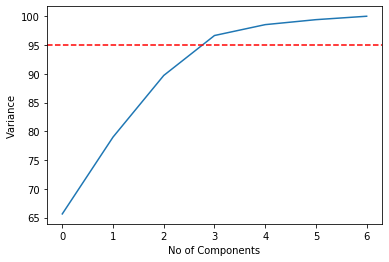

In [141]:
nforpca(x2sb)

In [142]:
# now, lets apply pca on x2sb
# there are total 7 features
for i in range(3,8):
    print(i," ",modified_pca(knn,x2sb,y2,i))

3   0.8146786336004558
4   0.8257307319315716
5   0.8078964205978283
6   0.8071860249389693
7   0.8045255266897126


In [143]:
# lets apply feature selection based on corr
# drop displacement, weight
x2sbcorr=x2sb.drop(['displacement','weight'],axis=1)
get_score(knn,x2sbcorr,y2)

(0.889620755738695, 0.7565245858910342, 3.3194692346819545)

In [144]:
# the score reduced

In [145]:
x2sbcorr1=x2sb.drop(['displacement','weight','horsepower'],axis=1)
get_score(knn,x2sbcorr1,y2)

(0.8385071026074221, 0.6674067059992913, 3.914168621814855)

In [150]:
x2sbcorr2=x2sb.drop(['cylinders'],axis=1)
get_score(knn,x2sbcorr2,y2)

(0.9159846469493438, 0.8111760227485791, 2.8624688644594896)

In [151]:
# the best method for feature selection is BFE

In [152]:
x2sbkn=bfe(knn,x2sb,y2,6)
x2sbkn.head(1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    1.5s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    2.1s finished

[2020-03-25 11:02:00] Features: 6/6 -- score: 0.7437403309771076

,cylinders,displacement,horsepower,weight,model_year,origin
0,1.491148,1.090604,0.673277,0.63087,-1.627426,-0.715145


In [153]:
# removed acceleration

In [154]:
get_score(knn,x2sbkn,y2)

(0.9160182220955767, 0.8520860536704966, 2.6839977645296207)

In [155]:
# now, lets tune knn,x2sbkn,y2

In [162]:
KNeighborsRegressor?

In [160]:
param_knn={'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
gridcv(knn,param_knn,x2sbkn,y2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    3.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.9s finished
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'algorithm': 'auto'}

In [161]:
knn1=KNeighborsRegressor(n_jobs=-1,algorithm='auto')

In [163]:
param_knn1={'p':[1,2],'n_neighbors':[2,4,6,8],'leaf_size':[5,10,20,25,30]}
gridcv(knn1,param_knn1,x2sbkn,y2)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    6.8s finished
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'leaf_size': 5, 'n_neighbors': 8, 'p': 2}

In [164]:
param_knn2={'p':[1,2],'n_neighbors':[6,7,8,9,10],'leaf_size':[5,6,7,8,10]}
gridcv(knn1,param_knn2,x2sbkn,y2)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    8.5s finished
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'leaf_size': 5, 'n_neighbors': 9, 'p': 2}

In [165]:
knn2=KNeighborsRegressor(n_jobs=-1,algorithm='auto',leaf_size= 5, n_neighbors= 9, p= 2)
get_score(knn2,x2sbkn,y2)

(0.8958802922755372, 0.8404632955235918, 2.6773176183691074)

In [166]:
# the score reduced a little

In [167]:
param_knn3={'p':[1,2],'n_neighbors':[6,7,8,9,10],'leaf_size':[5,6,7,8,10]}
gridcv(knn,param_knn3,x2sbkn,y2)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    8.5s finished
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'leaf_size': 5, 'n_neighbors': 9, 'p': 2}

In [168]:
knn3=KNeighborsRegressor(n_jobs=-1,leaf_size= 5, n_neighbors= 9, p= 2)
get_score(knn3,x2sbkn,y2)

(0.8958802922755372, 0.8404632955235918, 2.6773176183691074)

In [169]:
param_knn3={'p':[1,2],'n_neighbors':[2,4,8,12,15],'leaf_size':[5,10,15,20,30]}
gridcv(knn,param_knn3,x2sbkn,y2)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    8.5s finished
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'leaf_size': 5, 'n_neighbors': 8, 'p': 2}

In [174]:
# lets boost knn,x2sbkn,y2
adaknn=AdaBoostRegressor(base_estimator=knn, random_state=45, n_estimators=50, learning_rate=0.001)
get_score(adaknn,x2sbkn,y2)

(0.9198358030545495, 0.8624875633442333, 2.5264425582229255)

In [175]:
# the score improved

In [176]:
# lets cross validate adaknn,x2sbkn,y2
for i in range(2,10):
    print(i, " ", cross(adaknn,x2sbkn,y2,i))

2   (0.5750794491539462, 0.12927420926160238)
3   (0.7389713655701678, 0.14918107527526894)
4   (0.6227955598480334, 0.3114427394819387)
5   (0.7418441678009928, 0.18114231996177474)
6   (0.7358671763785393, 0.19981106603966495)
7   (0.7022575515865068, 0.1672289039857972)
8   (0.7099960643178466, 0.20199490062346945)
9   (0.7585401903262788, 0.1546893311865728)


In [177]:
# no under fitting or over fitting

In [178]:
# Evaluation Metrics
mse,rmse,mae=get_metrics(adaknn,x2sbkn,y2)
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Mean_Squared_Error:  6.382912000000001
Root_Mean_Squared_Error:  2.5264425582229255
Mean_Absolute_Error:  1.8120000000000003


# SVR

In [179]:
# svr with xs 0.8533181336170222, 0.7914219478728521, 2.748458371456396

In [180]:
# svr=SVR()

In [181]:
# Individual Model Pipeline:

# feature binning
# skewness removal

# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [184]:
# lets apply feature binning in cylinders
xb=x.copy()
for i in range(len(xb)):
    if xb['cylinders'].iloc[i]==5 or xb['cylinders'].iloc[i]==3:
         xb['cylinders'].iloc[i]=6
xb['cylinders'].value_counts()

4    204
8    103
6     91
Name: cylinders, dtype: int64

In [185]:
xsb=std(xb)
get_score(svr,xsb,y)

(0.8549734464269965, 0.7939605173266933, 2.733290260882546)

In [186]:
# the score improved a little bit

In [189]:
# now, lets check skewness in x2b
xb_sk=xb.copy()
xb_sk.skew()

cylinders       0.507935
displacement    0.719645
horsepower      0.935897
weight          0.531063
acceleration    0.163862
model_year      0.011535
origin          0.923776
dtype: float64

In [190]:
xb_sk['cylinders']=np.log(xb_sk['cylinders'])
xb_sk['displacement']=np.log(xb_sk['displacement'])
xb_sk['horsepower']=np.log(xb_sk['horsepower'])
xb_sk['weight']=np.log(xb_sk['weight'])
xb_sk.skew()

cylinders       0.367352
displacement    0.226003
horsepower      0.308252
weight          0.156304
acceleration    0.163862
model_year      0.011535
origin          0.923776
dtype: float64

In [191]:
xbs_sk=std(xb_sk)
get_score(svr,xbs_sk,y)

(0.8624922958688542, 0.8083024175734925, 2.6462564640023767)

In [192]:
# the score improved a little

In [193]:
# now, lets apply bfe on xbs_sk
# there are total 7 features
for i in range(3,8):
    print(i," ",modified_bfe(svr,xbs_sk,y,i))

3   0.814554749391546
4   0.8313986038359971
5   0.8171855895253091
6   0.8215721673410445
7   0.8083024175734925


In [194]:
# max score is at k=4

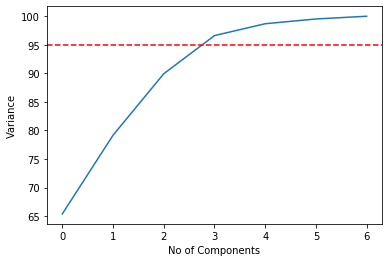

In [195]:
nforpca(xbs_sk)

In [196]:
# now, lets apply pca on xbs_sk
# there are total 7 features
for i in range(3,8):
    print(i," ",modified_pca(svr,xbs_sk,y,i))

3   0.7979756308359798
4   0.8052910878523544
5   0.8064639662424735
6   0.8034952836388558
7   0.8083024175734922


In [197]:
# we'll use bfe
xbs_sk_sv=bfe(svr,xbs_sk,y,4)
xbs_sk_sv.head(1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2020-03-25 11:40:54] Features: 6/4 -- score: 0.6828501123215422[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2020-03-25 11:40:54] Features: 5/4 -- score: 0.6935719133292965[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2020-03-25 11:40:54] Features: 4/4 -- score: 0.7025155403387344

,cylinders,displacement,weight,model_year
0,1.420232,1.137696,0.730508,-1.627426


In [199]:
get_score(svr,xbs_sk_sv,y)

(0.8666846085911022, 0.8313986038359971, 2.6078214317423707)

In [200]:
# lets tune svr,xbs_sk_sv,y

In [201]:
SVR?

In [202]:
param_svr={'kernel':['rbf','poly'],'degree':[2,3,4,5],'C':[0.001,0.01,0.1,1,2,4]}
gridcv(svr,param_svr,xbs_sk_sv,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.4s finished
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 4, 'degree': 2, 'kernel': 'rbf'}

In [204]:
param_svr1={'kernel':['rbf','poly'],'C':[3,4,5,6,7,8]}
gridcv(svr,param_svr1,xbs_sk_sv,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 7, 'kernel': 'rbf'}

In [205]:
svr1=SVR(C= 7, kernel= 'rbf')
get_score(svr1,xbs_sk_sv,y)

(0.8851440460248814, 0.8513800584647543, 2.5724034197098944)

In [206]:
# the score improved

In [218]:
# lets boost svr1,xbs_sk_sv,y
adasvr=AdaBoostRegressor(base_estimator=svr1, random_state=45, n_estimators=230, learning_rate=0.01)
get_score(adasvr,xbs_sk_sv,y)

(0.8938655747119327, 0.8550638489440539, 2.5843290223262074)

In [219]:
# the score improved

In [220]:
# lets cross validate adasvr,xbs_sk_sv,y
for i in range(2,10):
    print(i, " ", cross(adasvr,xbs_sk_sv,y,i))

2   (0.5156269156300388, 0.124956710666486)
3   (0.7499658992413639, 0.10386539462340746)
4   (0.6260940337984793, 0.31344239870885804)
5   (0.7806349896048204, 0.16814935235663475)
6   (0.7350757555420216, 0.2423651624569565)
7   (0.7451691648148075, 0.13702525354285852)
8   (0.7320688706479427, 0.19407788196848136)
9   (0.7774399769132956, 0.16149257350549479)


In [221]:
# no under fitting or over fitting

In [222]:
# Evaluation Metrics
mse,rmse,mae=get_metrics(adasvr,xbs_sk_sv,y)
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Mean_Squared_Error:  6.67875649563753
Root_Mean_Squared_Error:  2.5843290223262074
Mean_Absolute_Error:  1.9683123940894276


# GradientBoosting

In [223]:
# gb with xzs 0.9739087929031236, 0.8044093166858375, 3.2191259764265814

In [224]:
# gb=GradientBoostingRegressor(random_state=45)

In [225]:
# Individual Model Pipeline:

# feature binning
# skewness removal

# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [226]:
# lets apply feature binning in cylinders
xzb=xz.copy()
for i in range(len(xzb)):
    if xzb['cylinders'].iloc[i]==5 or xzb['cylinders'].iloc[i]==3:
         xzb['cylinders'].iloc[i]=6
xzb['cylinders'].value_counts()

4    202
8     98
6     91
Name: cylinders, dtype: int64

In [227]:
xzbs=std(xzb)
get_score(gb,xzbs,yz)

(0.9761523516956918, 0.8102090410393816, 3.1598822107035986)

In [228]:
# the score improved

In [229]:
# now, lets check skewness in x2b
xzb_sk=xzb.copy()
xzb_sk.skew()

cylinders       0.532966
displacement    0.690697
horsepower      0.990393
weight          0.542438
acceleration    0.217097
model_year      0.004518
origin          0.911256
dtype: float64

In [230]:
xzb_sk['cylinders']=np.log(xzb_sk['cylinders'])
xzb_sk['displacement']=np.log(xzb_sk['displacement'])
xzb_sk['horsepower']=np.log(xzb_sk['horsepower'])
xzb_sk['weight']=np.log(xzb_sk['weight'])
xzb_sk.skew()

cylinders       0.388397
displacement    0.221355
horsepower      0.320289
weight          0.165729
acceleration    0.217097
model_year      0.004518
origin          0.911256
dtype: float64

In [232]:
xzbs_sk=std(xzb_sk)
get_score(gb,xzbs_sk,yz)

(0.9761523516956918, 0.8100527074665591, 3.161859328751631)

In [234]:
# lets apply bfe on gb,xzbs,yz
# there are total 7 features
for i in range(3,8):
    print(i," ",modified_bfe(gb,xzbs,yz,i))

3   0.7546356980232547
4   0.782466522953226
5   0.7832271772071853
6   0.8124837703916072
7   0.8102090410393816


In [235]:
# best score at k=6

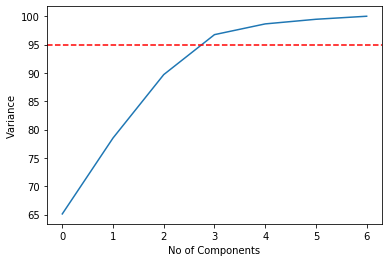

In [237]:
nforpca(xzbs)

In [236]:
# lets apply pca on gb,xzbs,yz
# there are total 7 features
for i in range(3,8):
    print(i," ",modified_pca(gb,xzbs,yz,i))

3   0.6862317779180526
4   0.7377300629076501
5   0.7282358573586954
6   0.7306659017921078
7   0.7403073283039637


In [238]:
# we'll use bfe
xzbs_gb=bfe(gb,xzbs,yz,6)
xzbs_gb.head(1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.5s finished

[2020-03-25 12:00:44] Features: 6/6 -- score: 0.7756858189110509

,cylinders,displacement,horsepower,acceleration,model_year,origin
0,1.516921,1.152907,0.753831,-1.370365,-1.649726,-0.718029


In [239]:
get_score(gb,xzbs_gb,yz)

(0.9720543219696903, 0.8124837703916072, 3.15518692883356)

In [240]:
# lets tune gb,xzbs_gb,yz

In [244]:
GradientBoostingRegressor?

In [245]:
param_gb={'loss':['ls', 'lad', 'huber', 'quantile'],'max_features':['auto','sqrt','log2'],'warm_start':[True,False]}
gridcv(gb,param_gb,xzbs_gb,yz)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    5.2s finished
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'loss': 'huber', 'max_features': 'sqrt', 'warm_start': True}

In [246]:
gb1=GradientBoostingRegressor(random_state=45,loss= 'huber', max_features= 'sqrt',warm_start= True)

In [248]:
param_gb1={'learning_rate':[0.001,0.01,0.1,1],'min_samples_split':[2,4,6,8],'min_samples_leaf':[1,2,4,6],
          'min_weight_fraction_leaf':[0.0,0.1,0.2],'max_depth':[2,3,4,5],'alpha':[0.5,0.7,0.9]}
gridcv(gb1,param_gb1,xzbs_gb,yz)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | ela

{'alpha': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0}

In [249]:
gb2=GradientBoostingRegressor(random_state=45,loss= 'huber', max_features= 'sqrt',warm_start= True,max_depth= 3,
 min_samples_leaf= 1,
 min_weight_fraction_leaf= 0.0)

In [251]:
param_gb2={'learning_rate':[0.1,0.2,0.3,0.5,0.7],'min_samples_split':[2,3,4,5],
          'alpha':[0.6,0.7]}
gridcv(gb2,param_gb2,xzbs_gb,yz)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   12.4s finished
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.6, 'learning_rate': 0.2, 'min_samples_split': 4}

In [252]:
gb3=GradientBoostingRegressor(random_state=45,loss= 'huber', max_features= 'sqrt',warm_start= True,max_depth= 3,
 min_samples_leaf= 1,
 min_weight_fraction_leaf= 0.0,alpha= 0.6, learning_rate= 0.2, min_samples_split= 4)

In [256]:
param_gb3={'n_estimators':range(50,170,10)}
gridcv(gb3,param_gb3,xzbs_gb,yz)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.0s finished
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 100}

In [257]:
gb4=GradientBoostingRegressor(random_state=45,loss= 'huber', max_features= 'sqrt',warm_start= True,max_depth= 3,
 min_samples_leaf= 1,
 min_weight_fraction_leaf= 0.0,alpha= 0.6, learning_rate= 0.2, min_samples_split= 4,n_estimators= 100)

In [258]:
get_score(gb4,xzbs_gb,yz)

(0.9618517594419905, 0.792599875893272, 3.104284198548782)

In [259]:
# the score decreased

In [260]:
param_gb4={'learning_rate':[0.1,0.2,0.3],'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3],
          'min_weight_fraction_leaf':[0.0,0.1,0.2],'max_depth':[2,3,4,5],'alpha':[0.5,0.6,0.7],'n_estimators':[50,100,150,200]}
gridcv(gb,param_gb4,xzbs_gb,yz)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 884 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 2612 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 3800 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5204 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6824 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 8660 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 10712 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 12980 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 15464 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 18164 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 21080 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 24212 tasks 

{'alpha': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100}

In [261]:
gb5=GradientBoostingRegressor(random_state=45,max_depth= 3,
 min_samples_leaf= 2,
 min_weight_fraction_leaf= 0.0,alpha= 0.5, learning_rate= 0.1, min_samples_split= 2,n_estimators= 100)
get_score(gb5,xzbs_gb,yz)

(0.9723069729118649, 0.8113797452543472, 3.1677197509567643)

In [273]:
# lets boost gb,xzbs_gb,yz
adagb=AdaBoostRegressor(base_estimator=gb, random_state=45, n_estimators=50, learning_rate=0.01)
get_score(adagb,xzbs_gb,yz)

(0.9761230946999941, 0.8077176530765542, 3.114966666368407)

In [274]:
# the score didn't improve

In [262]:
# lets cross validate gb,xzbs_gb,yz
for i in range(2,10):
    print(i, " ", cross(gb,xzbs_gb,yz,i))

2   (0.6048984193827388, 0.14835229671709693)
3   (0.7102427263265597, 0.12906533294537997)
4   (0.627915800075825, 0.3062045758346829)
5   (0.7756858189110509, 0.15748456351085102)
6   (0.7508416167556233, 0.19716894740030214)
7   (0.7592962359749907, 0.1378287204203127)
8   (0.7128541135647807, 0.1990932747178679)
9   (0.7585814834893871, 0.16922123924338867)


In [263]:
# no over or under fitting

In [275]:
# Evaluation Metrics
mse,rmse,mae=get_metrics(gb,xzbs_gb,yz)
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Mean_Squared_Error:  9.955204555882153
Root_Mean_Squared_Error:  3.15518692883356
Mean_Absolute_Error:  2.031565281255807


# Saving

In [277]:
# the best model is adaknn,x2sbkn,y2

In [278]:
fit(adaknn,x2sbkn,y2)

In [279]:
pred=get_pred(adaknn,x2sbkn,y2)

In [280]:
predic=pd.DataFrame(pred)
predic.to_csv('pred_mpg_adaknn.csv')

In [281]:
import joblib
joblib.dump(adaknn,'adaknn_mpg.pkl')

['adaknn_mpg.pkl']